**EDA-INTRODUCTORIO**

- Se realizar un modelo de prediccion, esto tomando el 20% de datos para su entrenamiento, para al final concluir que comportamiento se obtuvo y calificar que tan bueno o que tan malo fue el modelo

- Se buscara que relacion tienen los resultados en QT para comprobar si el modelo realizado en clase es correcto o  no, y de la misma manera evaluar el comportamiento que este posee al cambiar los datos que recibe de entrenamiento

- El dataset windata trabaja con valores ampliamente dispersos entre si, entre sus columnas se encuentran gran cantidad de rangos por lo cual trabajar con ellos resultaria con un modelo desajustado, de eventos como este nace la normalizacion, la cual se aplicara para trabajar la regresion lineal del dataset, es decir deja todos los datos a una misma escala, para uqe estos"convivan" de buena manera entre si, pero, ¿sera posible que esta normalizacion aplique de forma correcta la regresion lineal y se ajuste de forma precisa al dataset?, al igual que ¿Ajusta correctamente el gradiente descendiente para encontrar los minimos verdaderos de la funcion?

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [ ]:
# 1
# se carga el dataset en un objeto pandas "dataframe =SF"
# El dataset se encuentra almacenado en github, por lo cual
# se copia el link para importarlo
url = 'https://raw.githubusercontent.com/GodCarlosRojas/windata/main/winedata.csv'
SF = df_bmi = pd.read_csv(url)

In [ ]:
#Se verifica que el dataframe se haya importado correctamente
SF

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
SF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1599 non-null   float64
 1   1       1599 non-null   float64
 2   2       1599 non-null   float64
 3   3       1599 non-null   float64
 4   4       1599 non-null   float64
 5   5       1599 non-null   float64
 6   6       1599 non-null   float64
 7   7       1599 non-null   float64
 8   8       1599 non-null   float64
 9   9       1599 non-null   float64
 10  10      1599 non-null   float64
 11  11      1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# EDA INTRODUCTORIO
SF.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
1,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
2,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
3,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
4,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
5,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
6,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
7,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
8,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
9,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


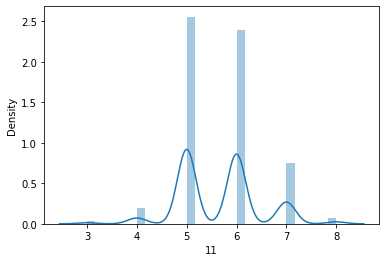

In [ ]:
#EDA Introductorio
# La grafica representa cuales son los valores dependientes que se freceuntaron mas
sns.distplot(SF['11'])

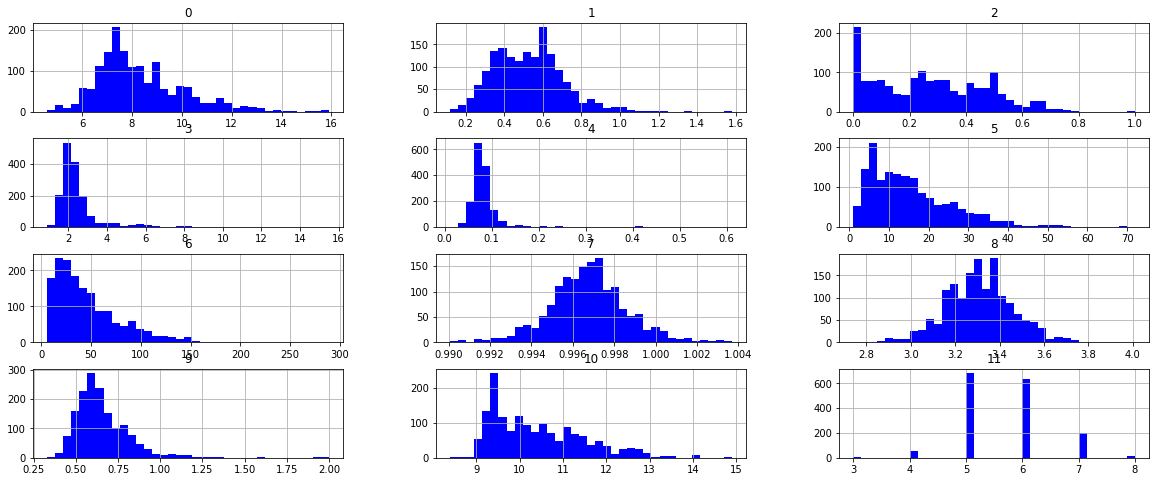

In [ ]:
#EDA introduccion
# Graficas de la cantidad de datos que pose cada una de la columnas
SF.hist(bins=35, figsize=(20,8), color='blue', alpha=1)
plt.show()

**Explicacion 1:**

-Se importa el dataframe guardado en el repositorio GitHub para rabajarlo y crear el modelo de regesion lineal

-El valor del promedio de la columna dependiente concuerda con el resultado de QT, osea 5.636023

EDA INTRODUCTORIO

- Aparte en los promedio por columna se evidencia que la columna 2 tiene menor promedio  y la columna 6 mayores promedio, esto sucede debido a que los datos aun no estan normalizados y los rangos de datos que maneja cada columna son ampliamente diferentes, por lo que se concluye que es necesario normalizar los datos para poder trabajarlos

- Los valores dependeintes mas frecuentados fueron 5 y 6

- En las graficas se visualiza con mayor facilidad cuales datos

In [ ]:
# 2
#Se imprimen el numero de columnas
len(SF.columns)

12

In [ ]:
#Se imprime el numero de filas
len(SF.index)

1599

**Explicacion 2:**
Se imprime el numero de filas y columnas. DOnde se puede evidenciar una clara relacion con lo ejecutado en QT, ya que la dos muestran el mismo resultado:Columnas: 12 ; Filas= 1599.

In [ ]:
#3
#Se necesita importar el metodo StandardScaler de la libreria Skalearn para normalizar los datos
from sklearn.preprocessing import StandardScaler

In [ ]:
# Se normalizan los datos, ya que en el dataset el desajuste de valor de los datos es bastante amplio,
# por lo cual la normalizacion es la mejor forma para poder trabajar con el gran rango de datos
# para que asi al momento de aplicar la regresion ase aplique la mejor posible y asi se obtendran los
# mejores resultados
norm = StandardScaler()
SFN = norm.fit_transform(SF)
SFN = pd.DataFrame(SFN)
SFN.describe().T
# SFN= dataset normalizado

,count,mean,std,min,25%,50%,75%,max
0,1599.0,3.554936e-16,1.000313,-2.137045,-0.700719,-0.241094,0.505795,4.355149
1,1599.0,1.733031e-16,1.000313,-2.278280,-0.769931,-0.043689,0.626688,5.877976
2,1599.0,-8.887339e-17,1.000313,-1.391472,-0.929318,-0.056360,0.765247,3.743574
3,1599.0,-1.244227e-16,1.000313,-1.162696,-0.453218,-0.240375,0.043416,9.195681
4,1599.0,3.021695e-16,1.000313,-1.603945,-0.371229,-0.179946,0.053845,11.127035
5,1599.0,-6.221137e-17,1.000313,-1.422500,-0.848716,-0.179300,0.490115,5.367284
6,1599.0,4.443669e-17,1.000313,-1.230584,-0.744040,-0.257497,0.472318,7.375154
7,1599.0,-3.473172e-14,1.000313,-3.538731,-0.607756,0.001760,0.576825,3.680055
8,1599.0,2.861723e-15,1.000313,-3.700401,-0.655141,-0.007213,0.575922,4.528282
9,1599.0,6.754377e-16,1.000313,-1.936507,-0.638220,-0.225128,0.424016,7.918677


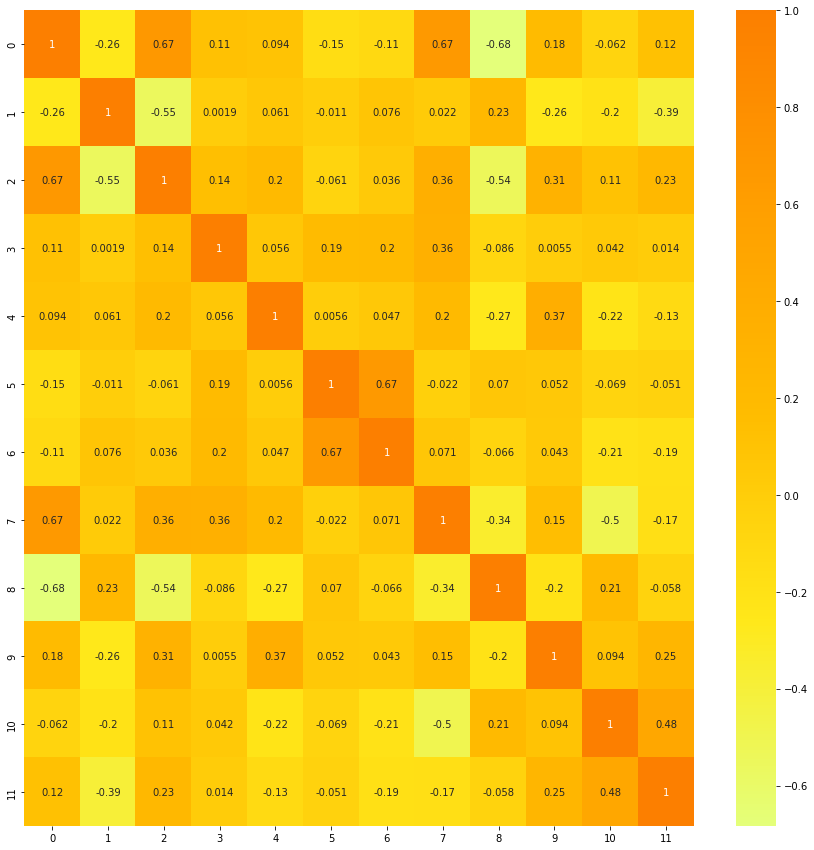

In [ ]:
# EDA introductorio
# Grafica de relacion que poseen los datos entre si
plt.figure(figsize=(15,15))
sns.heatmap(SFN.corr(), cmap='Wistia', annot=True)

**Explicacion 3:** Al normalizar los datos se tiene ya una mejor representacion del modelo de datos, para asi calcular su regresion lineal sea mas precisa



In [ ]:
# El dataframe trae 12 columnas, las cuales toca dividir
# entre las que son dependientes y las que son indepentiendes
# La columna 12 es la que posee los valores dependientes, por lo que
# esta hara de eje y, y el resto de eje X
y = SFN.drop([0,1,2,3,4,5,6,7,8,9,10],axis=1)
x = SFN.drop(11,axis=1)

In [ ]:
# Por medio de la libreria sklearn train_test_split se separaran los datos de test y los de train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,  y_test = train_test_split(x,y,test_size = 0.2, random_state =0)

In [ ]:
# Se requiere calcular cual es la cantidad de datos de testeo y datos de entrenamiento
print(len(X_test.index))
print(len(X_train.index))
print(len(y_test.index))
print(len(y_train.index))

320
1279
320
1279


**Explicacion 4:** Hablando en terminos de los train de x y de y ambos tienen 1279 filas, y los test de x y de y poseen 320 filas, este resultado concuerda con lo elaborado en QT

In [ ]:
#Se requiere importar las librerias LinearRegression, StandardScaler y pipeline para realizar
# la regresion lineal y el gradiente descendiente del modelo, para asi finalmente
# poder comparar con el modelo en QT los resultados obtenidos
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe=Pipeline([('scaler',StandardScaler()),('RL', LinearRegression())])
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('RL', LinearRegression())])

In [ ]:
#Se realizan preddiciones aplicando gradiente descendiente
# y regresion lineal, esto por medio de la libreria pipe
ytpredict = pipe.predict(X_train)
ytpredict = pipe.predict(X_test)
#predicciones
print("Prediccion: ",ytpredict)
#Evaluacion
R2 = pipe.score(X_train,y_train)
print("% Metrica de rendimiento", R2)

Prediccion:  [[ 1.81970167e-01]
 [-7.42991833e-01]
 [ 1.19032167e+00]
 [-3.67756646e-01]
 [ 3.75944652e-01]
 [-7.78895788e-01]
 [-2.97108616e-01]
 [ 5.15397834e-01]
 [-9.51818436e-01]
 [-8.48919198e-01]
 [-4.33805012e-01]
 [-2.76681719e-01]
 [ 8.63600007e-02]
 [-6.27764838e-01]
 [-1.32748931e-01]
 [ 9.22192540e-01]
 [ 1.45432703e+00]
 [ 1.26358001e-01]
 [ 4.21353427e-01]
 [-6.81130762e-01]
 [ 8.77940413e-01]
 [-5.84668426e-01]
 [ 7.45332137e-03]
 [ 6.32053906e-01]
 [-1.91055475e-01]
 [-7.45814284e-01]
 [-5.55927415e-01]
 [ 1.05511739e+00]
 [-3.75328199e-01]
 [ 8.28126585e-01]
 [ 4.93610906e-01]
 [ 2.38407642e-01]
 [-6.31564531e-02]
 [-4.34644086e-01]
 [ 1.49307871e-01]
 [ 6.40040381e-01]
 [-6.12742954e-01]
 [-1.90436136e-01]
 [ 9.33723916e-01]
 [ 1.90952755e-01]
 [-2.55975373e-01]
 [ 5.10433560e-01]
 [ 1.31989594e+00]
 [ 1.19603509e+00]
 [ 4.16832008e-01]
 [-1.04929663e+00]
 [-1.73875297e-01]
 [ 4.74158832e-01]
 [-1.82173952e-01]
 [ 5.84925109e-01]
 [-4.00593770e-01]
 [-4.34896150e-01]

**Conclusiones y Resultados**

1. Se demostro que los promedios de los valores dependientes es 5.636023

2. La cantidad de filas tomadas para el entrenamiento concuerda con las tomadas en QT, que es el 20% del total del dataframe

3. La desviacion estandar de QT se confirmo con el resultado dado, osea 1.000313

4. El resultado de la metrica y sus predicciones concuerdan con los obtenidos en QT, que el dataset cambie hace que todo cambie, aunque no da algo muy alejado a lo dado en qt, y realizando mas pruebas se demuestra que se da algo bastante aproximado

- Se concluye que phyton y c++ tienen diferente paradigma para seleccionar el 20% de un conjunto de datos, en c++ eigen siempre va a ser aleatorio, mientras que en phyton se puede ajustar para trabajar con la misma semilla de datos aleatorios, y asi al analizar resultados se realice de manera mas precisa

- No tiene importancia que datos se tomen para el estudio, esto debido a que el modelo de regresion lineal los ajustara de tal manera que esto no afecte el resultado de las predicciones a realizar

- Normalizar es un proceso fundamental para manipular los datos, esto ya que ajusta mas efectivamente y borra las barreras producidas por la variacion del rango de datos

- El modelo que se halló no es preciso, y solo cuenta con el 36.54% de prediccion, esto hace que no sea de fiar. Para mejorar este porcentaje se debe introducir mas datos para entrenamiento, no hay una medida universal para definir desde que porcentaje se transforma en un modelo de fiar, pero se concluye que con mas del 85%(ideal, aunque con mas del 70% se esta bien) de precision ya el modelo es de fiar, su rango de error es pequeño, por lo que gran parte de las predicciones seran acertadas

- Al realizar la prueba con mas datos para entrenamiento se denoto que el % de prediccion aumentaba significativamente, por lo que esta es una buena solucion para convertir el modelo en algo de fiar para realizar predicciones

REFERENCIAS:
1. Normalizar: https://www.delftstack.com/es/howto/python-pandas/pandas-normalize/
2. Pipeline: https://medium.com/datos-y-ciencia/pipeline-python-20c84e255444
3. Standard Scaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
4. LinearRegression: https://towardsdatascience.com/glr-with-python-and-scikit-learn-library-67b5b0d418ea
5. Skelearn: https://scikit-learn.org/stable/
6. Regresion lineal: https://www.youtube.com/watch?v=SsFBnvkoZa4&ab_channel=EstadigrafoMenteEstadistica
7. Gradiente descendiente 1: https://www.youtube.com/watch?v=IKloEocn3Hw&ab_channel=CodificandoBits
8. Gradiente descendiente 2:https://www.youtube.com/watch?v=A6FiCDoz8_4&ab_channel=DotCSV